# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Load the packages and dataset

For this illustration, we will use the mtcars dataset from previous lectures and demonstrations

1)(DV) ‘mpg’ is the miles per gallon of vehicles from a 1974 car magazine,

2) (IV1) ‘cyl’ is a categorical variable for the number of cylinders in the engine (i.e., 4, 6, or 8), and

3) (IV2) ‘am’ is a categorical variable for whether a vehicle has automatic (i.e., am = 0) or manual (i.e.,
am = 1) transmission.

In [2]:
## Install easystats package
install.packages("easystats")

## Load in the packages
library(tidyverse) ## Several useful functions
library(easystats) ## Several useful functions

## Check out the first 6 rows of the dataset
head(x = mtcars, n = 6)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’


# Attaching packages: easystats 0.7.4
✔ bayestestR  0.15.2   ✔ correlation 0.8.6 
✔ datawizard  1.0.0    ✔ effectsize  1.0.0 
✔ insight     1.0.2    ✔ modelbased  0.9.0 
✔ performance 0.13.0   ✔ parameters  0.24.1
✔ report      0.6.1    ✔ see         0.10.0




## Factors in R

In R, a variable/column can have the type or *class* of "factor". Other common types or classes of variables we have encountered in R are "Character", which is a string of letters together (e.g., "Character" is itself a character string), and "Numeric" or "Double" which are numbers (e.g., 3, 7.14, 95.72). Variables/columns of the class factor is a specific way to specify a categorical variable, even if those levels/categories use numerical values--which is exactly the case for both of our variables/columns above (i.e., 'cyl' and 'am').

Even though we can consider 'number of car cylinders' to be a categorical variable (e.g., we cannot have half a cylinder, there are discrete categories but the category labels are number values here, which I understand is confusing).

In [9]:
## Check the class of the cyl variable
class(mtcars$cyl)

## Check the class of the am variable
class(mtcars$am)

[1] "numeric"

[1] "numeric"

We see that these variables are both interpreted by R as numeric variables. Let's change that by setting `cyl` and `am` to be interpreted as factors (which are labeled categorical variables). Notice in the printed output below that the label under the column names `cyl` and `am` is `<fct>`? That means these variables (columns) are interpreted as factors.

In [6]:
## Convert the two categorical variables to 'factor' class in R
mtFactor <-
  mtcars %>%
  mutate(cyl = as.factor(cyl),
         am  = as.factor(am))

## Recode the levels of the two categorical variables
mtClean <-
  mtFactor %>%
  mutate(cyl = recode(cyl, "4" = "Four", "6" = "Six", "8" = "Eight"),
         am  = recode(am, "0" = "Auto", "1" = "Manual"))

## See whether the changes were made or not
mtClean %>%
  select(cyl, am) %>% ## success!
  head(n = 10)

,cyl,am
,<fct>,<fct>
Mazda RX4,Six,Manual
Mazda RX4 Wag,Six,Manual
Datsun 710,Four,Manual
Hornet 4 Drive,Six,Auto
Hornet Sportabout,Eight,Auto
Valiant,Six,Auto
Duster 360,Eight,Auto
Merc 240D,Four,Auto
Merc 230,Four,Auto


Notice that when we extract just the `cyl` variable, it shows as having 3 levels (i.e., 'Four', 'Six', and 'Eight')? These are the levels of the categorical variable.

In [10]:
## Examine the cyl variable specifically
mtClean$cyl

[1] Six   Six   Four  Six   Eight Six   Eight Four  Four  Six   Six   Eight
[13] Eight Eight Eight Eight Eight Four  Four  Four  Four  Eight Eight Eight
[25] Eight Four  Four  Four  Eight Six   Eight Four 
Levels: Four Six Eight

# Descriptive and summary statistics

When a variable is categorical, we cannot explore the describe_distribution() function and must rely on the summarize function.

Let's see the average miles per gallon (mpg) of vehicles based on the category of cylinders (cyl):

In [11]:
## The average miles per gallon for each level of engine cylinders
mtClean %>%
  group_by(cyl) %>%
  summarize(Mean = mean(mpg))

cyl,Mean
<fct>,<dbl>
Four,26.66364
Six,19.74286
Eight,15.10000


It looks like vehicles with fewer cylinders tend to have better gas mileage (city miles per gallon). Doubling the number of cylinders almost halves the fuel economy for the cars!

We can also see the average mpg of vehicles based on the type of transmission (am) they have:


In [12]:
## The average miles per gallon for each level of transmission
mtClean %>%
  group_by(am) %>%
  summarize(Mean = mean(mpg))


am,Mean
<fct>,<dbl>
Auto,17.14737
Manual,24.39231


These data show that automatic transmission vehicles tend to have lower gas mileage inside the city. Manual cars have notably greater fuel efficiency on average.

# Visualize the data

Because we have a categorical variable as the independent variable and a continuous dependent variable, we can report multiple boxplots (i.e., 1 boxplot of the outcome for each category/level).

## Visualizing mpg and car cylinders

Cars with 4 cylinders tend to have better fuel economy than those with 6, which tend to have better fuel economy than those with 8 cylinders.

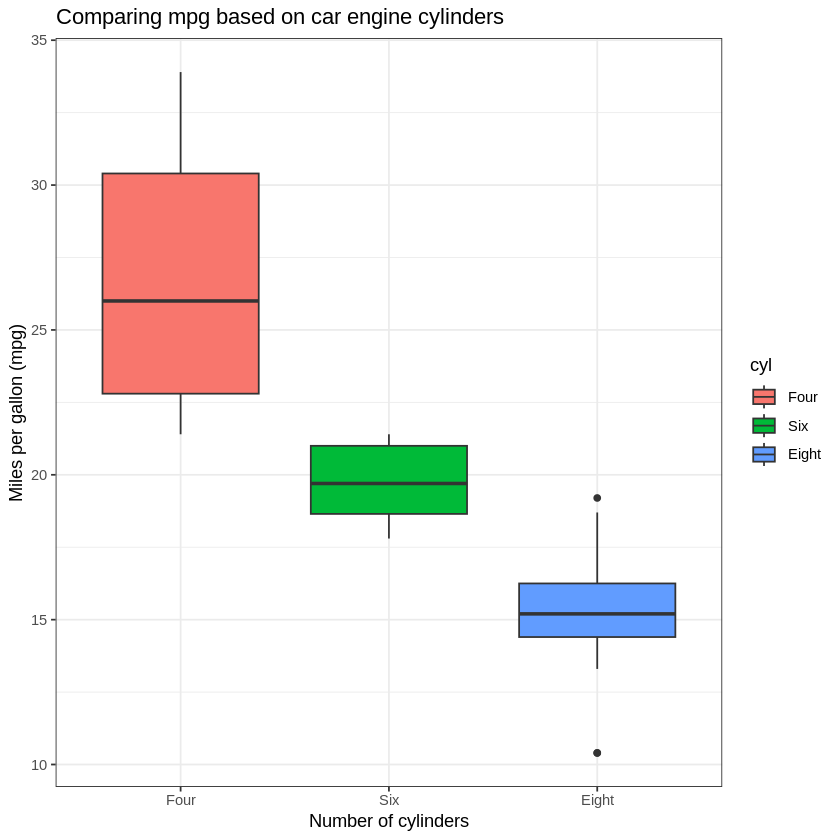

In [13]:
## Boxplots comparing mpg based on the number of cylinders
ggplot(data = mtClean, mapping = aes(x = cyl, y = mpg, fill = cyl)) +
  geom_boxplot() +
  labs(x = "Number of cylinders",
       y = "Miles per gallon (mpg)",
       title = "Comparing mpg based on car engine cylinders") +
  theme_bw()


## Visualizing mpg and transmission type

From the boxplots, we can see that cars with manual transmission tend to have the best fuel economy.

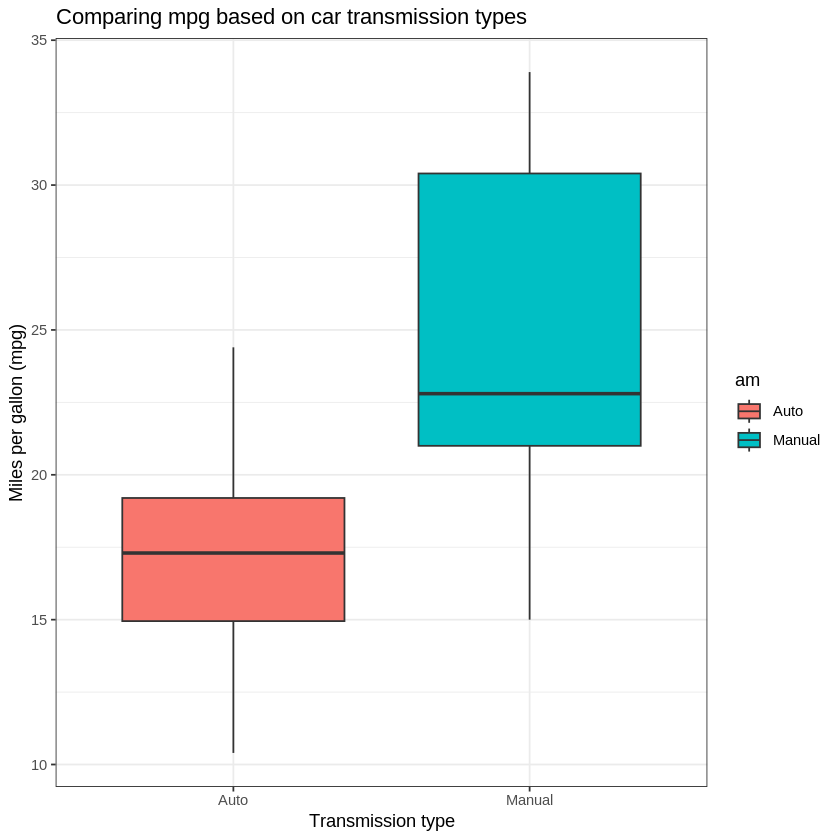

In [14]:
## Boxplots comparing mpg based on the transmission type
ggplot(data = mtClean, mapping = aes(x = am, y = mpg, fill = am)) +
  geom_boxplot() +
  labs(x = "Transmission type",
       y = "Miles per gallon (mpg)",
       title = "Comparing mpg based on car transmission types") +
  theme_bw()

# Effect of cylinders on mpg

Here, we are interested in the dependent variable of the miles per gallon for cars based on the independent variable of the number of engine cylinders in the car.

Notice below that the **output** from the `parameters()` function has the dummy coded variables but the **input** from the mtClean dataset *does not* actually create the dummy codes--that is done for us (phew!).


The *general* regression equation is as follows: $\hat{y} = b_0 + b_1 \cdot x_1$

The regression model that we estimated on these data includes 2 dummy codes (i.e., there are 3 levels/categories so we need [3-1] dummy codes): $\hat{y} = 26.66 - 6.92 \cdot \text{Cyl6} - 11.56 \cdot \text{Cyl8}$


In [15]:
## Predicting the amount of mpg based on engine cylinders
ModCyl <- lm(mpg ~ cyl, data = mtClean)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModCyl)

## The regression equation:
## yHat = 26.66 - 6.92*Cyl6 - 11.56*Cyl8

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),26.663636,0.9718008,0.95,24.67608,28.651192,27.437347,29,2.688358e-22
cylSix,-6.920779,1.5583482,0.95,-10.10796,-3.733599,-4.441099,29,1.194696e-04
cylEight,-11.563636,1.2986235,0.95,-14.21962,-8.907653,-8.904534,29,8.568209e-10


## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{y} = 26.66 - 6.92 \cdot \text{Cyl6} - 11.56 \cdot \text{Cyl8}$

**Intercept** (i.e., $b_0$): When the number of cylinders is four (i.e., Cyl6 and Cyl8 have values of 0), the predicted mpg is 26.66. This means Cyl4 is the referent group we are going to compare the other values.

**Cyl6**: The expected miles per gallon for vehicles with 6 cylinders is 6.92 units lower than the referent group (i.e., 26.66 - 6.92 = 19.74).

**Cyl8**: The expected miles per gallon for vehicles with 8 cylinders is 11.56 units lower than the referent group (i.e., 26.66 - 11.56 = 15.10).

## Recall the descriptive statistics

Comparing the dummy coded variable coefficients to the referent group gives us the same as the category means on the outcome variable!

In [16]:
## The average miles per gallon for each level of engine cylinders
mtClean %>%
  group_by(cyl) %>%
  summarize(Mean = mean(mpg))

cyl,Mean
<fct>,<dbl>
Four,26.66364
Six,19.74286
Eight,15.10000


# Effect of transmission on mpg

Again, we have a categorical variable for transmission type. Does the dependent variable of the miles per gallon for cars differ based on the independent variable of the transmission type? Let's find out.

The *general* regression equation is as follows: $\hat{y} = b_0 + b_1 \cdot x_1$

The specific regression equation for this data includes 1 dummy codes (i.e., there are 2 levels/categories so we need [2-1] dummy codes): $\hat{y} = 17.15 + 7.24 \cdot \text{Manual}$

In [17]:
## Predicting the mpg for cars based on transmission type
ModAM <- lm(mpg ~ am, data = mtClean)

## Report the estimated model parameters
parameters(ModAM)

## The regression equation:
## yHat = 17.15 + 7.24*Manual

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),17.147368,1.124603,0.95,14.85062,19.44411,15.247492,30,1.133983e-15
amManual,7.244939,1.764422,0.95,3.64151,10.84837,4.106127,30,2.850207e-04


## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{y} = 17.15 + 7.24 \cdot \text{Manual}$

**Intercept** (i.e., $b_0$): When the car has automatic transmission (i.e., am [Manual] has a value of 0), the predicted mpg is 17.15. This means automatic transmission is the referent group we are going to compare the other values.

**am [Manual]**: The expected miles per gallon for vehicles with manual transmission is 7.24 units higher than the referent group (i.e., 17.15 + 7.24 = 24.39).

## Recall the descriptive statistics

Comparing the dummy coded variable coefficients to the referent group gives us the same as the category means on the outcome variable!

In [18]:
## The average miles per gallon for each level of transmission type
mtClean %>%
  group_by(am) %>%
  summarize(Mean = mean(mpg))

am,Mean
<fct>,<dbl>
Auto,17.14737
Manual,24.39231
